In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import matplotlib.font_manager as fm
import matplotlib

font_path='C:\\Windows\\Fonts\\gulim.ttc'
font=fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

# 카드 및 신용 상태

- 카드 종류와 신용 사용 가능 금액, 사전 계산된 이탈 확률을 포함하며, 카드 관련 특성이 이탈에 미치는 영향 분석
    - 사용 가능 금액이 높고 기본 카드(Blue)를 사용하는 고객의 이탈 패턴 확인

### **이탈 관련 인사이트**

- `Card_Category` : 카드 종류
- `Avg_Open_To_Buy` : 평균 사용 가능 금액

In [5]:
# 데이터 로드
df=pd.read_csv('../../data/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [6]:
# 데이터셋 이름 가시성 좋게 일시적으로 한글로 변경
df_name = {
    "CLIENTNUM": "고객 번호",
    "Attrition_Flag": "이탈 여부",
    "Customer_Age": "고객 나이",
    "Gender": "성별",
    "Dependent_count": "부양 가족 수",
    "Education_Level": "교육 수준",
    "Marital_Status": "결혼 여부",
    "Income_Category": "소득 수준",
    "Card_Category": "카드 종류",
    "Months_on_book": "카드 사용 개월 수",
    "Total_Relationship_Count":	"총 고객 은행 관계 수",
    "Months_Inactive_12_mon": "최근 12개월 동안 비활성 개월 수",
    "Contacts_Count_12_mon": "최근 12개월 동안 고객 접촉 횟수",
    "Credit_Limit": "신용 한도",
    "Total_Revolving_Bal": "총 리볼빙 잔액",
    "Avg_Open_To_Buy": "평균 사용 가능 한도",
    "Total_Amt_Chng_Q4_Q1": "4분기 대비 1분기 총 금액 변화율",
    "Total_Trans_Amt": "총 거래 금액",
    "Total_Trans_Ct": "총 거래 횟수",
    "Total_Ct_Chng_Q4_Q1": "4분기 대비 1분기 총 거래 횟수 변화율",
    "Avg_Utilization_Ratio": "평균 카드 이용률",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "나이브 베이즈 분류기 예측값 1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "나이브 베이즈 분류기 예측값 2"
}

df.rename(columns=df_name, inplace=True)

In [7]:
# 각 열 데이터 값 종류 확인
for col in  df.columns:
    count=0
    print(f'{col} : ',end='')
    for value in df[col].unique():
        if count<10:
            print(f"'{value}'",end=',')
            count+=1
        else:
            print('10개 이상 존재...',end='')
            break
    print('\n')

고객 번호 : '768805383','818770008','713982108','769911858','709106358','713061558','810347208','818906208','710930508','719661558',10개 이상 존재...

이탈 여부 : 'Existing Customer','Attrited Customer',

고객 나이 : '45','49','51','40','44','32','37','48','42','65',10개 이상 존재...

성별 : 'M','F',

부양 가족 수 : '3','5','4','2','0','1',

교육 수준 : 'High School','Graduate','Uneducated','Unknown','College','Post-Graduate','Doctorate',

결혼 여부 : 'Married','Single','Unknown','Divorced',

소득 수준 : '$60K - $80K','Less than $40K','$80K - $120K','$40K - $60K','$120K +','Unknown',

카드 종류 : 'Blue','Gold','Silver','Platinum',

카드 사용 개월 수 : '39','44','36','34','21','46','27','31','54','30',10개 이상 존재...

총 고객 은행 관계 수 : '5','6','4','3','2','1',

최근 12개월 동안 비활성 개월 수 : '1','4','2','3','6','0','5',

최근 12개월 동안 고객 접촉 횟수 : '3','2','0','1','4','5','6',

신용 한도 : '12691.0','8256.0','3418.0','3313.0','4716.0','4010.0','34516.0','29081.0','22352.0','11656.0',10개 이상 존재...

총 리볼빙 잔액 : '777','864','0','2517','1247','2264','1396','1677','146

In [8]:
# 데이터 확인
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   고객 번호                   10127 non-null  int64  
 1   이탈 여부                   10127 non-null  object 
 2   고객 나이                   10127 non-null  int64  
 3   성별                      10127 non-null  object 
 4   부양 가족 수                 10127 non-null  int64  
 5   교육 수준                   10127 non-null  object 
 6   결혼 여부                   10127 non-null  object 
 7   소득 수준                   10127 non-null  object 
 8   카드 종류                   10127 non-null  object 
 9   카드 사용 개월 수              10127 non-null  int64  
 10  총 고객 은행 관계 수            10127 non-null  int64  
 11  최근 12개월 동안 비활성 개월 수     10127 non-null  int64  
 12  최근 12개월 동안 고객 접촉 횟수     10127 non-null  int64  
 13  신용 한도                   10127 non-null  float64
 14  총 리볼빙 잔액                10127 non-null

,고객 번호,고객 나이,부양 가족 수,카드 사용 개월 수,총 고객 은행 관계 수,최근 12개월 동안 비활성 개월 수,최근 12개월 동안 고객 접촉 횟수,신용 한도,총 리볼빙 잔액,평균 사용 가능 한도,4분기 대비 1분기 총 금액 변화율,총 거래 금액,총 거래 횟수,4분기 대비 1분기 총 거래 횟수 변화율,평균 카드 이용률,나이브 베이즈 분류기 예측값 1,나이브 베이즈 분류기 예측값 2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [9]:
# 의미 없는 데이터 열 제거
df.drop(['고객 번호','나이브 베이즈 분류기 예측값 1','나이브 베이즈 분류기 예측값 2'],axis=1,inplace=True)
df

,이탈 여부,고객 나이,성별,부양 가족 수,교육 수준,결혼 여부,소득 수준,카드 종류,카드 사용 개월 수,총 고객 은행 관계 수,최근 12개월 동안 비활성 개월 수,최근 12개월 동안 고객 접촉 횟수,신용 한도,총 리볼빙 잔액,평균 사용 가능 한도,4분기 대비 1분기 총 금액 변화율,총 거래 금액,총 거래 횟수,4분기 대비 1분기 총 거래 횟수 변화율,평균 카드 이용률
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [10]:
# 각 범주형 데이터 열 비율 확인
cols=df.select_dtypes(include='object').columns
for col in cols:
    print(df[col].value_counts(),'\n')


이탈 여부
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64 

성별
F    5358
M    4769
Name: count, dtype: int64 

교육 수준
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64 

결혼 여부
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64 

소득 수준
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64 

카드 종류
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64 



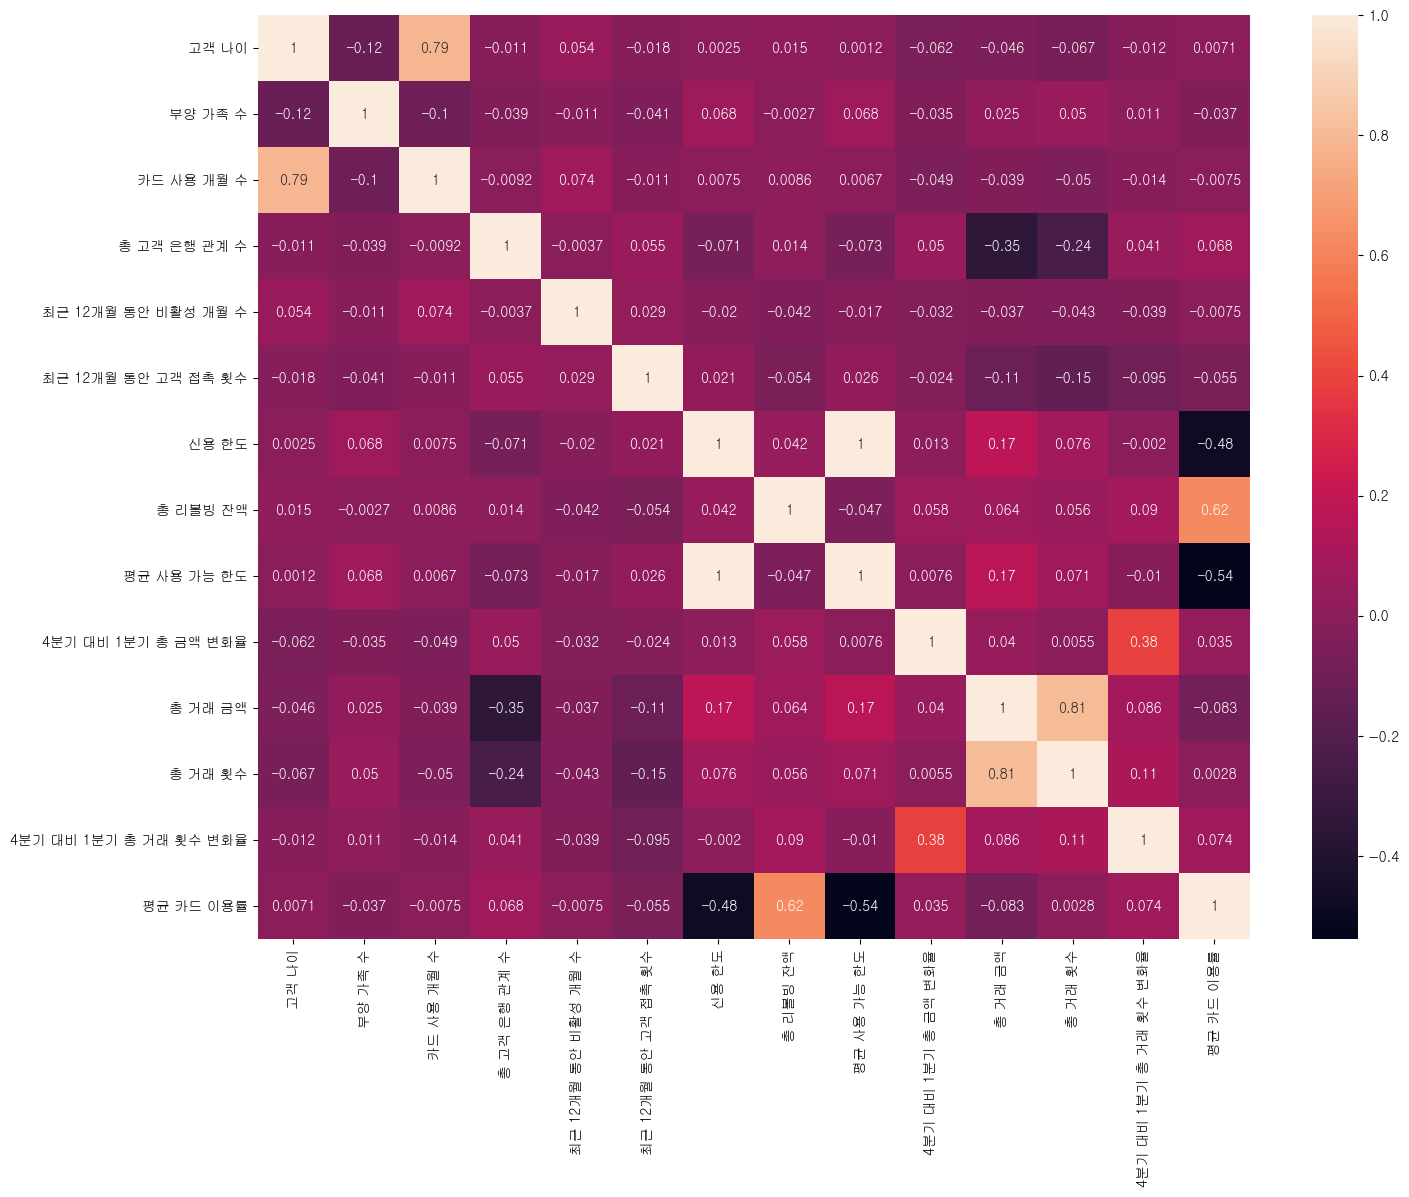

In [11]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [12]:
df['이탈 여부'] = df['이탈 여부'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

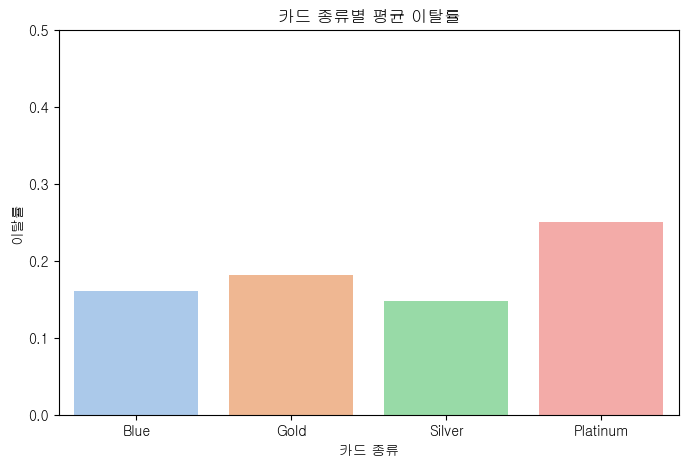

In [23]:
card_order = ['Blue', 'Gold', 'Silver', 'Platinum']
df['카드 종류'] = pd.Categorical(df['카드 종류'], categories=card_order, ordered=True)

# 카드별 이탈률 평균
churn_by_card=df.groupby('카드 종류',observed=True)['이탈 여부'].mean().reset_index()

# 시각화
plt.figure(figsize=(8,5))
sns.barplot(data=churn_by_card,x='카드 종류',y='이탈 여부', hue='카드 종류',palette='pastel')
plt.title('카드 종류별 평균 이탈률')
plt.xlabel('카드 종류')
plt.ylabel('이탈률')
plt.ylim(0,0.5)
plt.show()

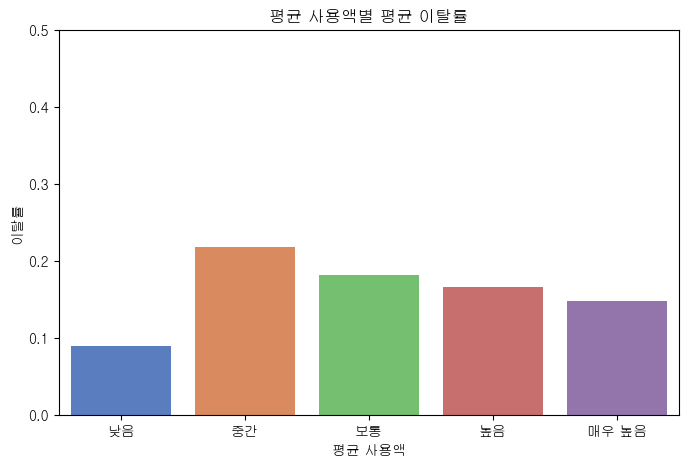

In [25]:
# 사용 가능 금액을 5분할
df['평균 사용액 구간'] = pd.qcut(df['평균 사용 가능 한도'], q=5, labels=['낮음', '중간', '보통' ,'높음', '매우 높음'])

# # 평균사용액별 이탈률 평균
churn_by_Buy=df.groupby('평균 사용액 구간', observed=True)['이탈 여부'].mean().reset_index()

# # 시각화
plt.figure(figsize=(8,5))
sns.barplot(data=churn_by_Buy,x='평균 사용액 구간',y='이탈 여부', hue='평균 사용액 구간',palette='muted')
plt.title('평균 사용액별 평균 이탈률')
plt.xlabel('평균 사용액')
plt.ylabel('이탈률')
plt.ylim(0,0.5)
plt.show()

       카드 종류 평균 사용액 구간     이탈 여부
0       Blue        낮음  0.089744
1       Blue        중간  0.217778
2       Blue        보통  0.181683
3       Blue        높음  0.167883
4       Blue     매우 높음  0.143253
5       Gold        보통  0.000000
6       Gold     매우 높음  0.185841
7     Silver        보통  1.000000
8     Silver        높음  0.132075
9     Silver     매우 높음  0.149554
10  Platinum     매우 높음  0.250000


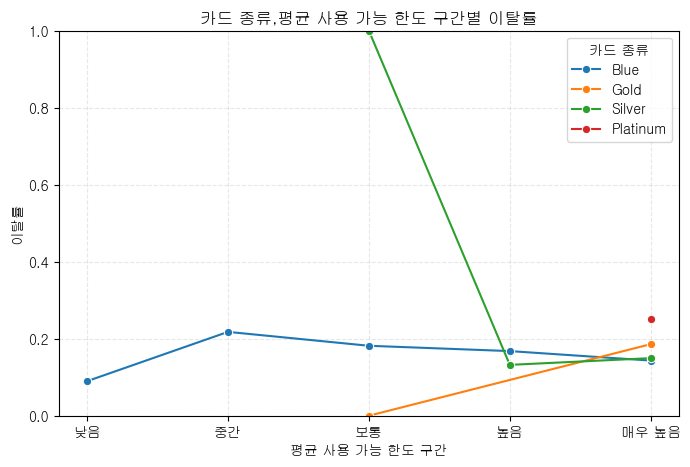

In [39]:
churn_by_card_buy=df.groupby(['카드 종류','평균 사용액 구간'],observed=True)['이탈 여부'].mean().reset_index()

print(churn_by_card_buy)

plt.figure(figsize=(8, 5))
sns.lineplot(data=churn_by_card_buy, x='평균 사용액 구간', y='이탈 여부', hue='카드 종류', marker='o')
plt.title('카드 종류,평균 사용 가능 한도 구간별 이탈률')
plt.xlabel('평균 사용 가능 한도 구간')
plt.ylabel('이탈률')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [ ]:
# # 라벨 인코딩(데이터의 순서 o): 이탈 여부, 성별, 교육 수준
# # 원 핫 인코딩(데이터의 순서 x): 결혼 여부, 소득수준, 카드종류

# from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# le=LabelEncoder()
# OHe=OneHotEncoder()

# # 라벨 인코딩
# le_cols=['이탈 여부', '성별', '교육 수준']
# for col in le_cols:
#     df[col]=le.fit_transform(df[col])

# OHe_cols=['결혼 여부', '소득 수준', '카드 종류']
# df = pd.get_dummies(df, columns=OHe_cols, drop_first=True)